In [756]:
#importing necessary packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter("ignore")

In [757]:
data = pd.read_csv("/content/Iris.csv")  # reading the CSV file using pandas

In [758]:
data.head()  # prints the first 5 rows of the dataframe

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [759]:
data.isnull().sum()   # to check if there exists any null values in the dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [760]:
data.shape   # returns (m,n) where m -> no of rows  n->no of columns

(150, 6)

In [761]:
data.describe()  

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [762]:
print(data['SepalLengthCm'].max())
print(data['SepalWidthCm'].max())
print(data['PetalLengthCm'].max())
print(data['PetalWidthCm'].max())

7.9
4.4
6.9
2.5


In [763]:
setosa = data[data['Species'] == 'Iris-setosa']
versicolor = data[data['Species'] == 'Iris-versicolor']
virginica = data[data['Species'] == 'Iris-virginica']

In [764]:
print(setosa.shape)
print(versicolor.shape)
print(virginica.shape)

(50, 6)
(50, 6)
(50, 6)


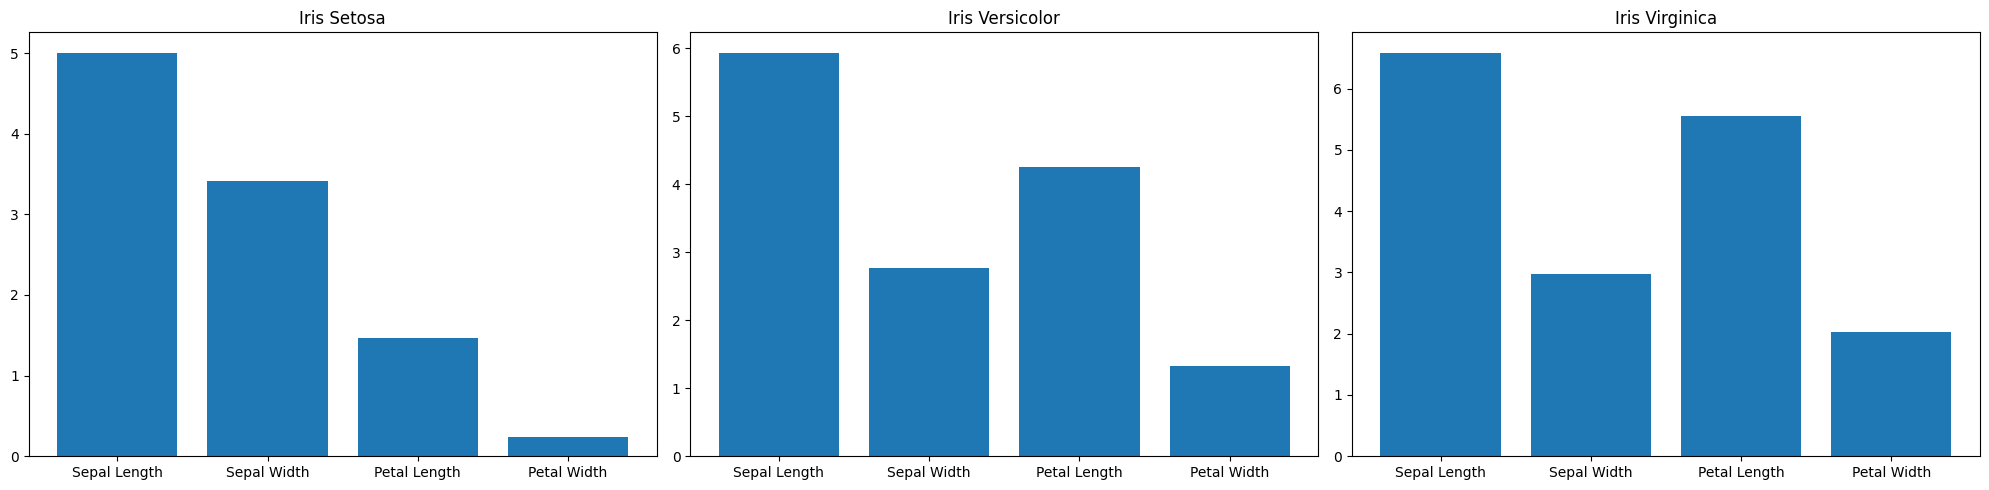

In [765]:
setosa_means = setosa.mean(numeric_only=True)[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
versicolor_means = versicolor.mean(numeric_only=True)[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
virginica_means = virginica.mean(numeric_only=True)[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# bar charts for each species
axs[0].bar(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], setosa_means)
axs[0].set_title('Iris Setosa')

axs[1].bar(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], versicolor_means)
axs[1].set_title('Iris Versicolor')

axs[2].bar(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], virginica_means)
axs[2].set_title('Iris Virginica')

plt.tight_layout()
plt.show()

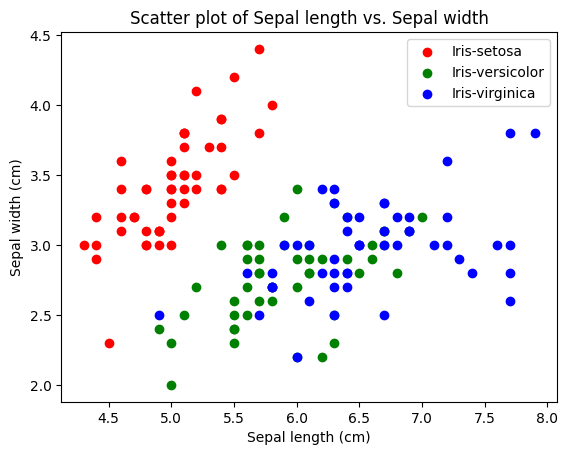

In [766]:
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], color='red', label='Iris-setosa')
plt.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], color='green', label='Iris-versicolor')
plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], color='blue', label='Iris-virginica')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Scatter plot of Sepal length vs. Sepal width')
plt.legend()

plt.show()

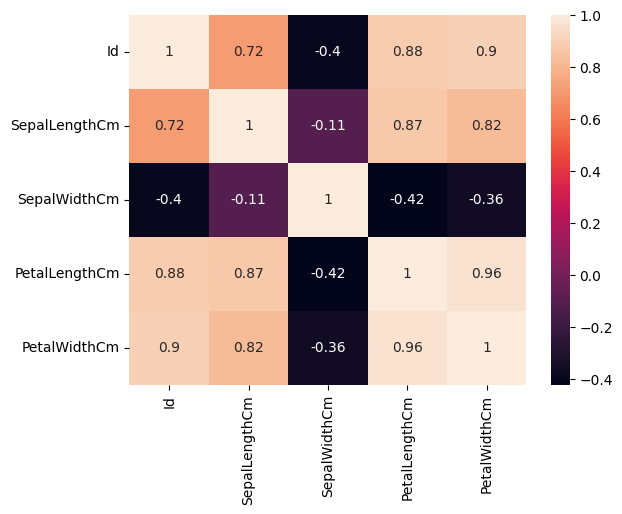

In [767]:

corr_matrix = data.corr()
#heatmap for correlation
sns.heatmap(corr_matrix, annot=True)

plt.show()

In [768]:
X = data.drop(columns={'Id','Species'},axis=1)
Y = data['Species']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [769]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.25,random_state=1) # dividing the data into training and testing data 

In [770]:
X_train.shape,X_test.shape

((112, 4), (38, 4))

In [771]:
model = LogisticRegression(max_iter=1000)   # instance of LogisticRegression


In [772]:
model.fit(X_train,Y_train)     # fitting the data to model

LogisticRegression(max_iter=1000)

In [773]:
train_data_prediction = model.predict(X_train)    # model prediction for training data
print(train_data_prediction)

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris

In [774]:
score = accuracy_score(Y_train,train_data_prediction)     # accuracy score for training data
print(score)

0.9732142857142857


In [775]:
test_data_prediction = model.predict(X_test)      # prediction for testing data
# print(X_test)
# print(test_data_prediction)
score = accuracy_score(Y_test,test_data_prediction)   # accuracy score for testing data
print(score)       # accuracy_score = 0.9736842105263158

0.9736842105263158


In [776]:
f1score = f1_score(Y_test,test_data_prediction,average='weighted')
print(f1score)     # f1 score to check the model performance # f1score = 0.9739522830846216

0.9739522830846216


In [777]:
user_input = [[5.0,2.3,3.3,1.0]]
user_input_scaled = scaler.transform(user_input)        # scaling the user_input using StandardScaler
predicted_species = model.predict(user_input_scaled)

print("Predicted species for the given input: ", predicted_species)



Predicted species for the given input:  ['Iris-versicolor']
